TEST THE MODEL

Import datagenerator to train and test

In [106]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [107]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range=0.2,zoom_range= 0.2,horizontal_flip=True,vertical_flip=False)

In [108]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [105]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
from PIL import Image
import pathlib

Apply ImageDataGenerator Functionality To Train And Test set

In [109]:
from google.colab import drive

In [110]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print("This dataset has been created and uploaded by IBM-TeamID-IBM-Project-22773-1659857836")

This dataset has been created and uploaded by IBM-TeamID-IBM-Project-22773-1659857836


In [111]:
x_train= train_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset/dataset/training_set",target_size=(64,64),class_mode="categorical",batch_size=48)

Found 10324 images belonging to 9 classes.


In [112]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset/dataset/test_set",target_size= (64,64),class_mode= "categorical",batch_size=48)


Found 2280 images belonging to 9 classes.


In [113]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [114]:
x_test.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}


MODEL BUILDING

In [115]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [118]:
model=Sequential()

In [117]:
model.add(Convolution2D(32,(3,3), input_shape=(64,64,1), activation = 'relu'))

In [119]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [120]:
model.add(Flatten())

In [121]:
model.add(Dense( units=512, activation='relu'))

In [122]:
model.add(Dense(units=9, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [126]:
model.fit(x_train,steps_per_epoch=len(x_train),epochs=5,validation_data=x_test,validation_steps=len(x_test))

Epoch 1/5
216/216 [==============================] - 162s 749ms/step - loss: 0.1131 - accuracy: 0.9633 - val_loss: 7.3499 - val_accuracy: 0.6456
Epoch 2/5
216/216 [==============================] - 39s 181ms/step - loss: 0.0356 - accuracy: 0.9900 - val_loss: 7.9273 - val_accuracy: 0.6461
Epoch 3/5
216/216 [==============================] - 42s 197ms/step - loss: 0.0294 - accuracy: 0.9923 - val_loss: 7.7494 - val_accuracy: 0.6469
Epoch 4/5
216/216 [==============================] - 41s 190ms/step - loss: 0.0173 - accuracy: 0.9951 - val_loss: 8.0277 - val_accuracy: 0.6461
Epoch 5/5
216/216 [==============================] - 42s 194ms/step - loss: 0.0072 - accuracy: 0.9984 - val_loss: 8.4261 - val_accuracy: 0.6465


In [133]:
model.save('Realtime.h5')

In [128]:
a=len(x_train)
b=len(x_test)

Length of training and testing data

In [129]:
print(a)
print(b)

216
48


TEST THE MODEL

In [141]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

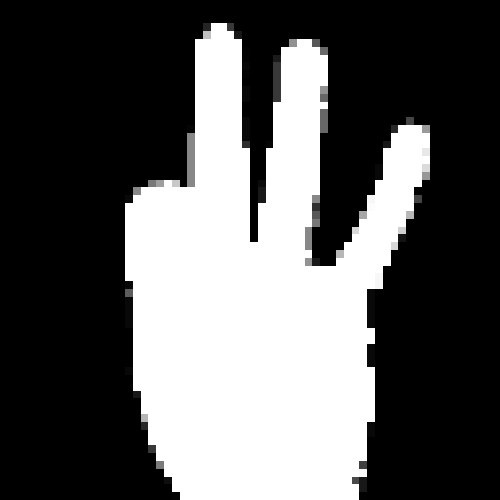

In [149]:
img = image.load_img('/content/drive/MyDrive/dataset/dataset/test_set/F/107.png',target_size = (500,500))
img

In [150]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [153]:
from skimage.transform import resize
def detect(frame):
  img=resize(frame,(64,64,1))
  img=np.expand_dims(img,axis=0)
  if(np.max(img)>1):
    prediction=model.predict(img)
    print(prediction)
    prediction=model.predict_classes(img)
    print(prediction)

In [157]:
arr= image.img_to_array(img)

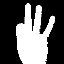

In [159]:
frame=cv2.imread('/content/drive/MyDrive/dataset/dataset/test_set/F/107.png')
data=detect(frame)
from google.colab.patches import cv2_imshow
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()